#Homework 2 - Dry Lab Practice & Single-Molecule Sequencing Formats

Theodore M. Nelson

The teaching objective is to introduce the large number of sequencing formats currently used within single-molecule sequencing.

##Download Data

Please refer to Homework 1 for additional examples.

In [1]:
! wget https://zenodo.org/records/10989179/files/HCV_IVT_004_500_RANDOM_READS.fast5

--2024-04-17 22:46:27--  https://zenodo.org/records/10989179/files/HCV_IVT_004_500_RANDOM_READS.fast5
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108570398 (104M) [application/octet-stream]
Saving to: ‘HCV_IVT_004_500_RANDOM_READS.fast5’

HCV_IVT_004_500_RAN 100%[===================>] 103.54M  18.4MB/s    in 7.1s    

2024-04-17 22:46:35 (14.5 MB/s) - ‘HCV_IVT_004_500_RANDOM_READS.fast5’ saved [108570398/108570398]



##Managing Software via BioConda

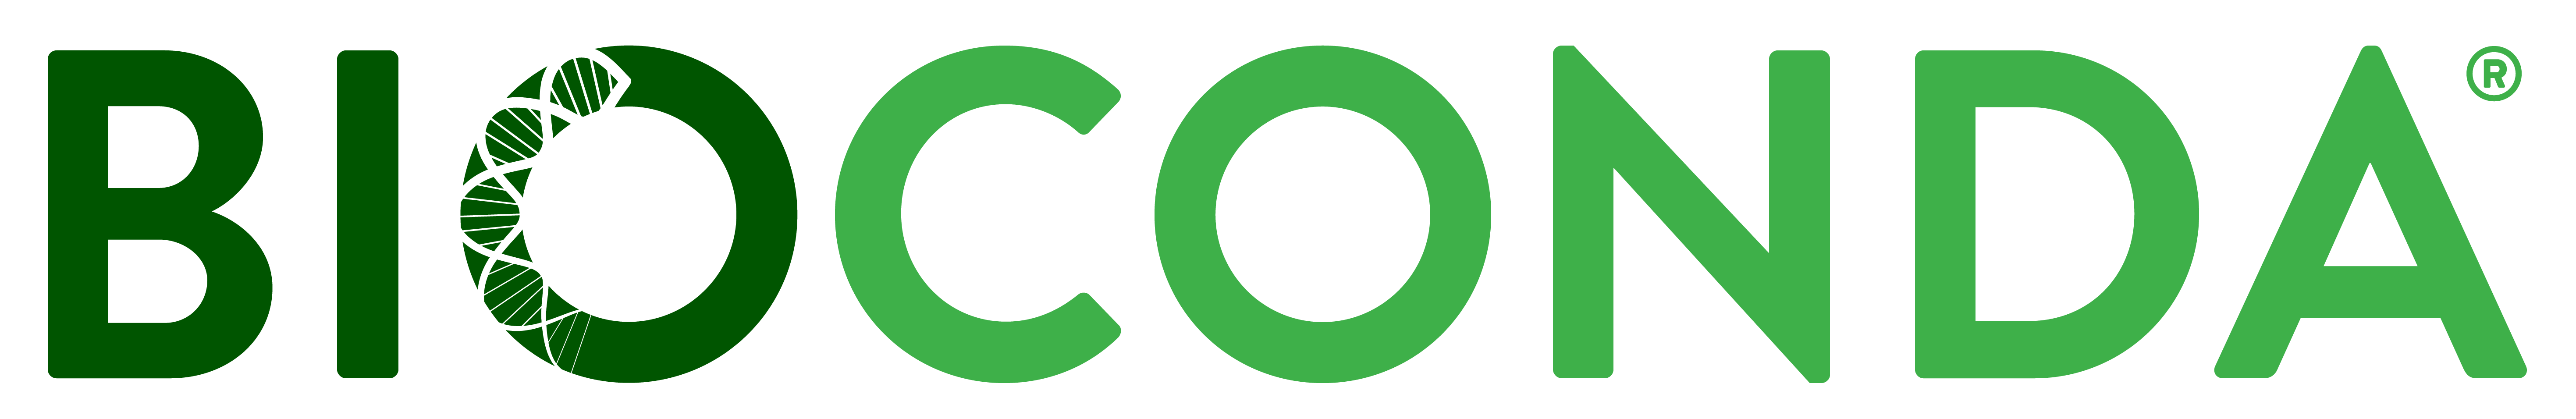

There are numerous options for organizing your bioinformatics pipelines on your personal computer; each software developer offers multiple routes to download their packages. One of the easiest managers is BioConda which allows you to setup individual environments and easily install packages. Their repository includes over 8,000 different bioinformatics-specific software. This tutorial will mainly utilize BioConda for all package installs. Please see the following pages in order to learn more about installing BioConda on your own computer: [BioConda](https://bioconda.github.io/user/install.html) and [Managing Environments via Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-17 22:46:35--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   126MB/s    in 0.6s    

2024-04-17 22:46:35 (126 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

##Homework 2 Solutions

Questions

**1.]** In the last question of C2, you isolated all alignments to HCV. Please use the readIDs for the alignments to HCV to isolate signals in the blow5 file that align to HCV. (Hint: see the slow5tools document for a command isolating reads from blow5 by read ID)

**2.]** Use the formula in the slow5 file format specifications [linked in the C2 notebook] to convert the raw signal to the picoAmps signal.

We perform the commands from C2 to generate fastq reads and sam alignments from the original signal file.

In [4]:
! wget https://cdn.oxfordnanoportal.com/software/analysis/dorado-0.5.3-linux-x64.tar.gz

--2024-04-17 22:48:22--  https://cdn.oxfordnanoportal.com/software/analysis/dorado-0.5.3-linux-x64.tar.gz
Resolving cdn.oxfordnanoportal.com (cdn.oxfordnanoportal.com)... 18.65.3.102, 18.65.3.107, 18.65.3.82, ...
Connecting to cdn.oxfordnanoportal.com (cdn.oxfordnanoportal.com)|18.65.3.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2149600728 (2.0G) [application/x-tar]
Saving to: ‘dorado-0.5.3-linux-x64.tar.gz’

dorado-0.5.3-linux- 100%[===================>]   2.00G   140MB/s    in 17s     

2024-04-17 22:48:39 (123 MB/s) - ‘dorado-0.5.3-linux-x64.tar.gz’ saved [2149600728/2149600728]



In [5]:
! tar xf /content/dorado-0.5.3-linux-x64.tar.gz

In [6]:
! cd /content/dorado-0.5.3-linux-x64/bin ; ./dorado download --model rna004_130bps_hac@v3.0.1

[2024-04-17 22:49:34.148] [info]  - downloading rna004_130bps_hac@v3.0.1 with httplib


In [7]:
! cd /content/dorado-0.5.3-linux-x64/bin ; ./dorado basecaller --emit-fastq rna004_130bps_hac@v3.0.1 /content/HCV_IVT_004_500_RANDOM_READS.fast5 > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.fastq

[2024-04-17 22:49:36.692] [info]  - Note: FASTQ output is not recommended as not all data can be preserved.
[2024-04-17 22:49:36.692] [info] > Creating basecall pipeline
[2024-04-17 22:49:36.868] [info]  - BAM format does not support `U`, so RNA output files will include `T` instead of `U` for all file types.
[2024-04-17 22:50:03.689] [info]  - set batch size for cuda:0 to 1792
[2024-04-17 22:50:03.692] [warning] FAST5 support is unoptimized and will result in poor performance. Please convert your dataset to POD5: https://pod5-file-format.readthedocs.io/en/latest/docs/tools.html#pod5-convert-fast5
[2024-04-17 22:50:34.701] [info] > Simplex reads basecalled: 451
[2024-04-17 22:50:34.701] [info] > Simplex reads filtered: 49
[2024-04-17 22:50:34.701] [info] > Basecalled @ Samples/s: 2.861912e+06
[2024-04-17 22:50:34.713] [info] > Finished


In [9]:
! conda install bioconda::minimap2 -y

Solving environment: | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconda::minimap2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    k8-0.2.5                   |       he513fc3_0         1.7 MB  bioconda
    minimap2-2.17              |       hed695b0_3         393 KB  bioconda
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  k8                 bioconda/linux-64::k8-0.2.5-he513fc3_0
  minimap2           bioconda/linux-64::minimap2-2.17-hed695b0_3



k8-0.2.5             | 1.7 MB    | : 100% 1.0/1 [00:00<00:0

In [10]:
! wget https://github.com/Theo-Nelson/SMS-data/raw/main/references/hcv.fasta

--2024-04-17 22:53:17--  https://github.com/Theo-Nelson/SMS-data/raw/main/references/hcv.fasta
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Theo-Nelson/SMS-data/main/references/hcv.fasta [following]
--2024-04-17 22:53:17--  https://raw.githubusercontent.com/Theo-Nelson/SMS-data/main/references/hcv.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9692 (9.5K) [text/plain]
Saving to: ‘hcv.fasta’

hcv.fasta           100%[===================>]   9.46K  --.-KB/s    in 0s      

2024-04-17 22:53:17 (30.8 MB/s) - ‘hcv.fasta’ saved [9692/9692]



In [12]:
! minimap2 -ax splice -t 16 -uf -k14 hcv.fasta /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.fastq > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sam

[M::mm_idx_gen::0.006*0.72] collected minimizers
[M::mm_idx_gen::0.011*0.79] sorted minimizers
[M::main::0.011*0.79] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.014*0.63] mid_occ = 31
[M::mm_idx_stat] kmer size: 14; skip: 5; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.015*0.64] distinct minimizers: 3270 (99.94% are singletons); average occurrences: 1.009; average spacing: 2.933
[M::worker_pipeline::0.719*1.09] mapped 459 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -ax splice -t 16 -uf -k14 hcv.fasta /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.fastq
[M::main] Real time: 0.720 sec; CPU: 0.782 sec; Peak RSS: 0.052 GB


In [13]:
! conda install bioconda::slow5tools -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [18]:
! slow5tools f2s /content/HCV_IVT_004_500_RANDOM_READS.fast5 -o /content/HCV_IVT_004_500_RANDOM_READS.slow5

[list_all_items] Looking for '*.fast5' files in /content/HCV_IVT_004_500_RANDOM_READS.fast5
[f2s_main] 1 fast5 files found - took 0.000s
[f2s_iop] 1 proceses will be used.
[f2s_child_worker::INFO] Summary - total fast5: 1, bad fast5: 0

[f2s_main] Converting 1 fast5 files took 13.576s

[main] cmd: slow5tools f2s /content/HCV_IVT_004_500_RANDOM_READS.fast5 -o /content/HCV_IVT_004_500_RANDOM_READS.slow5
[main] real time = 13.578 sec | CPU time = 13.272 sec | peak RAM = 0.104 GB


We install seqkit to manipulate the fastq files.

In [3]:
! conda install -c bioconda seqkit -y

Solving environment: - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - seqkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       h06a4308_0         127 KB
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    seqkit-2.8.1               |       h9ee0642_0         7.1 MB  bioconda
    ------------------------------------------------------------
                                           Total:        11.1 MB

The following NEW packages will be INSTALLED:

  seqkit             bioconda/linux-64::seqkit-2.8.1-h9ee0642_0

The following pack

We will now extract the readIDs from the fastq, sam, and slow5 files.

In [15]:
! seqkit fx2tab /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.fastq | awk -v OFS='\t' '{array[$1]=1} END {for (readID in array) print readID}' > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_FASTQ_readIDS.txt

In [16]:
! samtools view /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sam | cut -f1 | sort | uniq > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_SAM_readIDS.txt

/bin/bash: line 1: samtools: command not found


In [19]:
! awk -F '\t' '{if (NR > 1) print $1}' /content/HCV_IVT_004_500_RANDOM_READS.slow5 > /content/HCV_IVT_004_500_RANDOM_READS_SIGNALS_SLOW5_readIDS.txt

When comparing these, we discover that there exist readIDs that are within the FASTQ and SAM files but not in the SLOW5 file, suggesting the generation of new reads from signals that aren't marked. What might be going on?



Note: this chart was generated by downloading the TXT files and inputing them into InteractiVenn (https://www.interactivenn.net/).

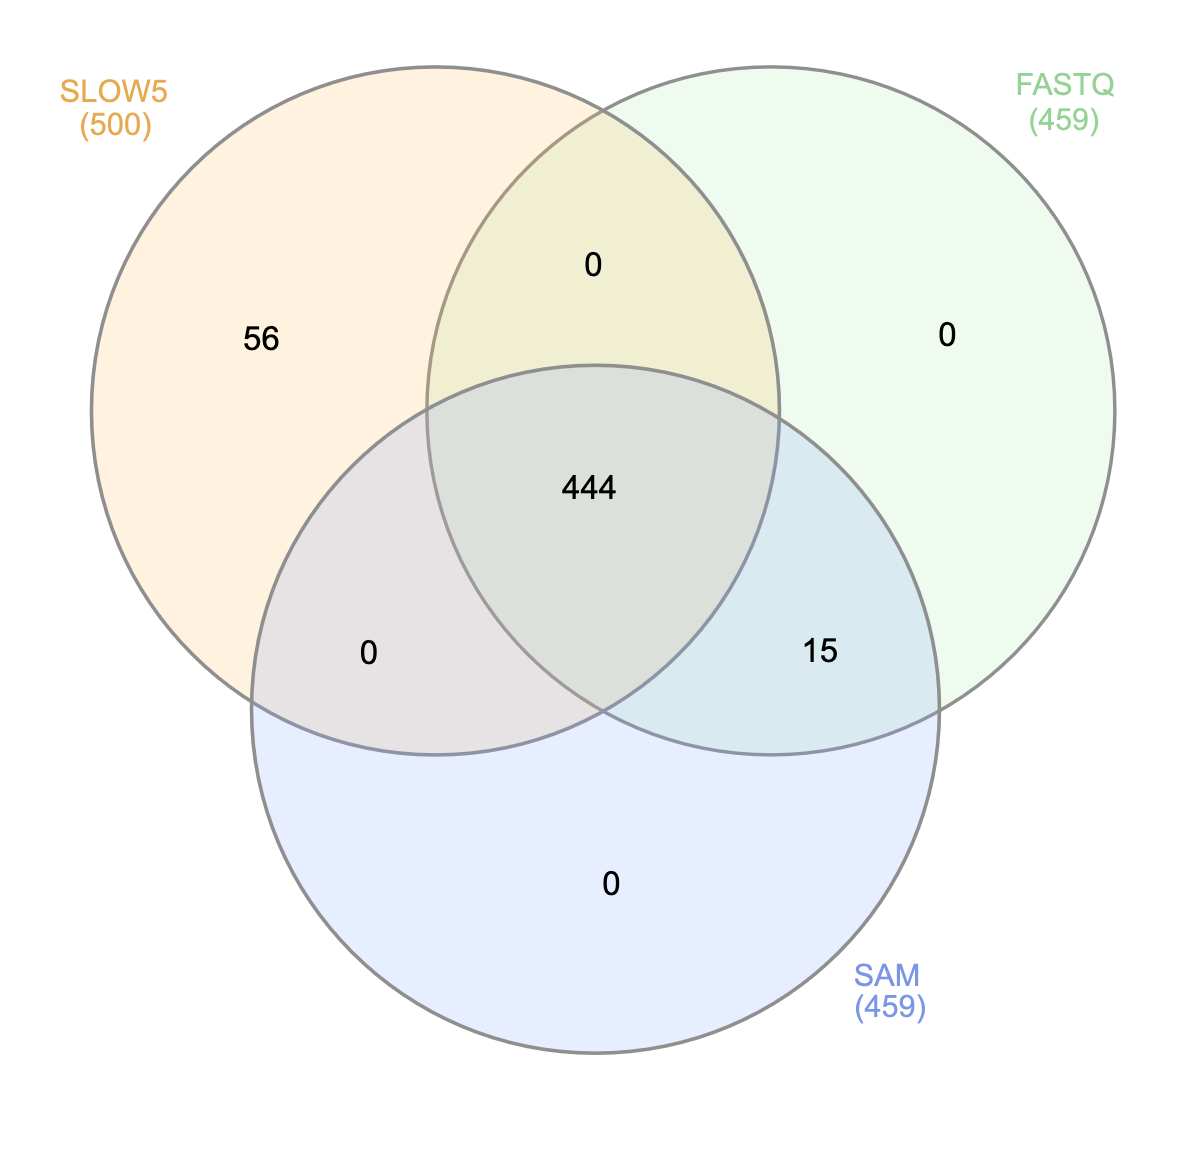

We note that there are 500 original signals in the file, per the definition of a signal. Additionally, there are within the Slow5 bubble a total of 444+56 readIDs, summing up to the full 500. This means either each SLOW5 readID was basecalled at least once or basecalled not at all. What might be the origin of these new readIDs?

We can use the InteractiVENN program (http://www.interactivenn.net/) to explore this via a web-based GUI. This reveals that the following readIDs are novel:

547a8a67-fe63-4159-b376-d91853b96024

d46bc2e7-1a6f-4acd-895f-afbe2a9effca

0206f99b-9262-4287-a54c-693e0c316302

8603b16e-dace-4a41-9fb1-4e9f6f54e3c6

9c68faa1-b278-4da8-ad0a-fd3fc899743a

101cd377-97c6-430b-b65a-b750808f5501

fb5119c3-e122-4ed8-8874-c9388cc60b43

7b8c8050-de50-45f3-9408-bcf3832295f6

2db3694a-c439-46c0-98f0-7281602d465a

db3c9059-3bfc-442f-99d2-dc111e4807ff

a043eebe-afc1-454b-ac20-42acc15be42c

1056b836-31b9-4c2b-bc71-7db425fd0560

c6d5d617-24a8-4005-8179-5cade96e2456

10670444-d81c-44a2-8262-2a8d8b01ea77

03805097-b5ec-4841-bbda-84cbff04d3ee

We can use seqkit to view the fastq entry, which is currently the entry the most 'upstream' appearance in the pipeline related to this issue.

In [20]:
! seqkit grep -n -p "03805097-b5ec-4841-bbda-84cbff04d3ee" /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.fastq > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_EXAMPLE.fastq

We can investigate the information for this read entry.

In [21]:
! head /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_EXAMPLE.fastq

@03805097-b5ec-4841-bbda-84cbff04d3ee
CGGCGGCGGCGGC
+
$$$$#####$$$#


There is no information here to suggest where this new readID might have come from. At this point, it seems we are stuck.

To ChatGPT: "When comparing readIDs present in a Slow5 file, FASTQ file, and SAM, I note the appearance of fifteen new readIDs in the FASTQ and SAM files compared with the original slow5 file. </pasted read IDs here> Could you explain why this might happen?"

"The presence of new read IDs in the FASTQ and SAM files that are not found in the original SLOW5 file can occur due to several factors or processing steps in a typical next-generation sequencing (NGS) workflow. Here are some possible explanations for this discrepancy:

    Data Filtering and Quality Control:
        Quality Filtering: During the conversion from SLOW5 to FASTQ format, reads may be filtered based on quality scores. If the SLOW5 file contained low-quality reads that were then excluded during FASTQ generation, it's unusual but possible that errors in processing or software bugs could introduce inconsistencies.
        Error in Processing: There could be an error or bug in the software or script used for converting from SLOW5 to FASTQ format, leading to mismatches in read IDs.

    Data Corruption or Manipulation:
        Corruption: Files can become corrupted due to errors in file handling, storage issues, or transmission errors. This could potentially alter read IDs or lead to the inclusion/exclusion of reads.
        Manual Editing: If any manual editing or manipulation of the data files was done between formats, this could introduce discrepancies in read IDs.

    Software-Specific Handling of Reads:
        Different software tools might interpret or handle data differently. For instance, some tools might generate additional reads or modify read IDs based on certain conditions or configurations in their processing pipeline.

    Version and Compatibility Issues:
        If different versions of software tools were used for handling the data at different stages, discrepancies due to changes in software behavior across versions could lead to inconsistencies in read IDs.

    Parallel Processing Anomalies:
        If data processing was performed in a parallel computing environment, anomalies due to non-deterministic processing orders or merging processes might lead to inconsistencies, including the generation of new reads or loss of some read IDs.

    Duplication or Synthetic Reads:
        In some cases, software might introduce synthetic reads or duplicates to compensate for regions with low coverage or to enhance data integrity, although this should typically be documented or configurable by the user.

To diagnose and correct these issues, consider the following steps:

    Review Software Logs and Parameters: Check the logs and parameters used in the software for converting SLOW5 to FASTQ and FASTQ to SAM to ensure there were no warnings or errors that might explain the discrepancies.
    Verify Software Versions and Settings: Ensure that all software used is compatible and configured correctly according to the best practices recommended for your specific sequencing technology.
    Reprocess a Subset of Data: As a test, reprocess a subset of the original SLOW5 data through the same pipeline to see if the issue is reproducible, which can help identify if the problem is systematic or a one-off anomaly.
    Consult Community and Support Forums: Sometimes specific issues might have been encountered and documented by other users of the same tools, and solutions or patches might be available.

Understanding the specific context and software used in your sequencing workflow will be crucial to resolving these issues effectively."

TLDR: "don't know"

There are a few clues that we can use to solve this issue. From the Dorado output we have the following relevant error messages:

[2024-04-11 21:28:53.969] [info]  - Note: FASTQ output is not recommended as not all data can be preserved.

[2024-04-11 21:28:57.125] [info]  - BAM format does not support `U`, so RNA output files will include `T` instead of `U` for all file types.


We learn:

1.] there is data that we are not preserving - that could potentially help us untangle this issue perhaps! and

2.] even though the appearance of BAM is a bug, it demonstrates that this is the preferred output format. This is further substantiated by the Dorado GitHub repository, which lists the BAM output as the first for basecalling (even without alignment): https://github.com/nanoporetech/dorado

**Why would the BAM file format be preferred?**

The ability to define your own supplemental tags / add information relevant to your specific application.

In this case, the developer of slow5tools discovered such an addition, as have other users since (https://github.com/nanoporetech/dorado/issues/673), whereby the pi:Z tag represents the original signal source ID for individual read IDs.

Furthermore, this confirms that there is an algorithm within Dorado that can potentially split a single signal into multiple reads!

**Why do these split reads exist?**

The initial issue above pointed to the following documentation: "When a single input read contains multiple concatenated reads, dorado basecaller will split the original input read into separate subreads. This operation is performed by default for both DNA and RNA. Each subread has a new read id that is assigned by dorado. The following tags can be used to associate a subread to its parent" - https://github.com/nanoporetech/dorado/blob/release-v0.5.3/documentation/SAM.md#split-read-tags

**Raising the question: what is a concatenated read?** A more satisfying answer emerges from the following manuscript:

"The reads were run through Duplex Tools v0.2.9 (Duplex Tools., 2022) to split concatenated reads by Nanopore adapter ten times. Single fastq reads were observed to be made up of continual sequences “concatenated” together due to quick succession through the pore and consisted of entire 4.5 kb reads digitally stitched together. Ten rounds were needed despite the “allow-multiple” option being selected as each round produced additional splitting. This step has been fixed in the newest Guppy release (v6.1.7) with “—do_read_splitting” enabled." - https://www.frontiersin.org/journals/microbiology/articles/10.3389/fmicb.2023.1201064/full

Armed with this knowledge, we can install and run dorado to access the original readIDs:

In [22]:
! cd /content/dorado-0.5.3-linux-x64/bin ; ./dorado basecaller rna004_130bps_hac@v3.0.1 /content/HCV_IVT_004_500_RANDOM_READS.fast5 > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_NO_ALIGNMENTS.bam

[2024-04-17 22:56:45.847] [info] > Creating basecall pipeline
[2024-04-17 22:56:45.878] [info]  - BAM format does not support `U`, so RNA output files will include `T` instead of `U` for all file types.
[2024-04-17 22:57:08.755] [info]  - set batch size for cuda:0 to 1792
[2024-04-17 22:57:08.777] [warning] FAST5 support is unoptimized and will result in poor performance. Please convert your dataset to POD5: https://pod5-file-format.readthedocs.io/en/latest/docs/tools.html#pod5-convert-fast5
[2024-04-17 22:57:38.563] [info] > Simplex reads basecalled: 451
[2024-04-17 22:57:38.563] [info] > Simplex reads filtered: 49
[2024-04-17 22:57:38.563] [info] > Basecalled @ Samples/s: 2.979420e+06
[2024-04-17 22:57:38.579] [info] > Finished


We can view the first

In [23]:
! sudo apt-get install libncurses5

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libtinfo5
The following NEW packages will be installed:
  libncurses5 libtinfo5
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 207 kB of archives.
After this operation, 883 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libtinfo5 amd64 6.3-2ubuntu0.1 [100 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libncurses5 amd64 6.3-2ubuntu0.1 [107 kB]
Fetched 207 kB in 1s (406 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling 

In [24]:
! conda install bioconda::samtools -y

Solving environment: - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconda::samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    samtools-1.3.1             |                0         1.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  samtools           bioconda/linux-64::samtools-1.3.1-0 



                                                                        
Prepari

In [25]:
! samtools view /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_NO_ALIGNMENTS.bam

002613cc-1f69-48b9-a6c7-81043b77e4e1	4	*	0	0	*	*	0	0	GAATAGGGGCGACACTCCGCCATGAATCACTCCCCTGTGAGGACTACTGTCACGCAGAAAGCGCCTAGCCATGGCGTTAGTATGAGTGTCGCACAAAATACCAGGCCCCCCCCTCCCCGGGAGAGCCATAGTGGTCTCCGATGGAACCGGTGAGTACACCGGAATTGCCGGGAAGACTGGGTCCTTCTTGGATAAACCCACTTTATGCCCGGCCATTTGTACGTGCCCCCGCAAGACTGCTAGCCGAGTAGCGTTGGGTTGCGAAAGGCCTTGTGGTACTGCCTGATAGGGCGCTTGCGAGTGCCCCGGGAGGTCGTAGACCGTGCACCATGAGCACAAATCCTAACTTCAAAGAATTCTGAGAACTTAACCGTCGCCAGAAGACGTTAAGTTCCGGCGGCGGCCAGATCGGCTATCC	)257?<72&''',/3457@A@>>0-.7?>?A=;=75''''(*--.-;'%25432300/>:9:8BCGIIHJDA==<=@CBDEBA=:>11++,3,''*'&'*51DDFDGFE=:666;?@BFFEA@@=>>?=@A<'&&$%&&'''28:899<?===<;;22169<===<<=?CBCA<8=A>CD>7*')*04??;<;;=@><<')&+?BA><<>>?==<:-,-47:@BBCEBCCBBA@@?=;778;:;<=====>>>A9:;;97779<:86699<?>>BA<>=<??@A?=>:8<::<=>B,,,-567:9:;A>=841((();11.*(&'')2.)59::??>;2299+'(&$&1384,)%#$#$&'9-/)(()<;=8554.:<;?DB:-'')(;31.(+)2234;@AA?>@@@:85)%%&)++	qs:i:13	du:f:3.82125	ns:i:15285	ts:i:2550	mx:i:4	ch:i:2812	st:Z:1970-01-01T17:43:27Z	rn:i:28920	fn:Z:HCV_IVT_

In [26]:
! samtools view /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED_NO_ALIGNMENTS.bam | grep "547a8a67-fe63-4159-b376-d91853b96024"

547a8a67-fe63-4159-b376-d91853b96024	4	*	0	0	*	*	0	0	GAATCAGGAAATCGTGGTCGCCGACAGCTTGATCGCGGCTCGGTCGGTTCGGGTTCGGAGTTCGGTGGTGGTCGGAGCTCGGGGAAATCGGCTCGCGAAACTCGGGGAAACGCGCGATCGGGTTCGGGTTCGGGGAAACTTCGGGGATCGGCGATCGGGTCGTCAAGCTTCGGTGGTGAACTCCGGCTCGTCAGCACCGACCGCCGCCGCAGTTCGGAATCCGGCGCCGCCGTCGGGGAGGAAACTGTCCGGTTCGGGTTCGACTTCGGGTTCGGCTCGCCGGGCCGCGGTTCGGCCGCCGCCGCGGTTCGGGCCGCGCAGTTCGGGGATTCTTCTTCTTCACGATCATCAGCTTCGGCTTCGGCTTCGGCCGCGGCGATCAAGCGGCATCTCGTGTTCGGCGAACGCGGCGATCGGCTTCGGGTTCGGAGCTCGGGGTTCGGCGATCAGGAGCTCCGCCGGTGATCAGGTGGACGTGATCAGTTCAGGTGATCAGTTCAGGGACGTCACCCAAATCCGATCGGGAAATCTTGAATTCAAGCTTGAATTCAGTTCGGGTTTCGGTTAGGAATCCGATTACAATGACTTCAGTGAGACAGCTGATCAAGGGGAAATGGGTTCGGGTTCAGTTCGGCGGCGCGATCAAGCTCCAGTTCGGGAAATCAGGAATTCAGGCAGCTCAAGCTCGCCGCGCGGCGGCCGCCGTCCGGCGGCGACGTGTCCAGCTCAAGCTCCGGGCTTCGGGCCGCGGCGGCTCGGGTTCGGGGTTCAGGTTAGGTTCGGGTTCAGGTTCAGGTTCAGGTGATCTCCGGCGCCGCGGCGGCGGCGGAGGAGGAGGAGGAGCCGCAGTACCAGGAATCCAGGTGTTTCGTCGTCGTCAATTCAAACCAATTCAATTTCAACTTCATCTTCGCCAATGCTTTCAATATTCAAACTTTCGACATCAA

You can note above that only split reads have the pi:Z tag, while non-split reads do not have this.

For now, we can develop a solution ignoring these split reads, since they come from the same initial read, assuming that the parent read likewise aligns to the same reference genome. We can later extract a list of pi:Z reads from these dorado files in our exploratory analysis to see if split reads cluster differently from regular reads aligning to HCV.



A more complex solution would be to add entries into the slow5 file, accounting for information contained within the bam file, splitting signals based on defined start and end sites in the Dorado file, as contained in the sp:i: tag.

We will implement the simpler approach, including alignments:

In [27]:
! samtools view -Sb /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sam > /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.bam

In [28]:
! samtools sort /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.bam -o /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sorted.bam

In [29]:
! samtools index /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sorted.bam

The next commands result in a common list of shared IDs; the subsequent command isolates these reads from the slow5 file.

In [33]:
! samtools view /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sorted.bam HCV_genome | cut -f 1 | sort -k1,1 | uniq > ALIGNMENTS.txt

In [36]:
! samtools view /content/HCV_IVT_004_500_RANDOM_READS_BASECALLED.sorted.bam HCV_genome | cut -f 1 | sort -k1,1 | uniq | slow5tools get /content/HCV_IVT_004_500_RANDOM_READS.blow5  -o HCV_IVT_004_ALIGNED_SIGNALS.slow5

[get_main] Fetched 59 reads - 0 failed
[get_main] read time = 0.279 sec

[main] cmd: slow5tools get /content/HCV_IVT_004_500_RANDOM_READS.blow5 -o HCV_IVT_004_ALIGNED_SIGNALS.slow5
[main] real time = 0.292 sec | CPU time = 0.286 sec | peak RAM = 0.017 GB


In [34]:
! head -n 100 ALIGNMENTS.txt

000e5c35-eb54-437b-bf7d-5e134976074c
002613cc-1f69-48b9-a6c7-81043b77e4e1
003c34c4-c6e3-457c-b374-b93e63362fce
00d05022-604d-47c9-9092-48d3e09498f9
01e194d5-4de0-4577-9404-6adbaebffc8f
01e1a8c5-53bf-4a87-8ef0-585a96ce62a8
026975bb-69c5-45d0-b83e-f18bb1452c9f
02fea266-c1ee-426b-b33d-26faef46587c
038accfe-0756-44f5-87f8-56cf222d1e85
03ce8914-48bb-4ab1-9935-3b90c2ed862d
03f444dd-c08e-4bc9-9f03-3212fc842608
043f64e7-7f50-4ec4-a2d2-af3b1a752f4f
04c22b5b-51ab-4699-9404-5c156118706e
05d77a56-1647-4fd5-95a4-82196ba3d68f
05d82301-9737-49ea-93bf-069b936635af
063652bc-e0de-4990-805c-b24cea0a660d
06533d39-6534-4fb4-967e-14d88b94b095
0700ea28-3a76-4af8-9067-fa3c8b93cbff
079d49a5-ea8e-4a7f-91fa-51c1ea785f88
07d2c3b9-ee46-43d3-ac14-63e42f626949
0814d015-d3c7-466a-a399-7fc86c7b7007
0933df56-918c-4be0-9bde-f12351d1773e
094c15ee-2da6-46b9-b8c6-adc4a9282083
0ba71e70-5a28-40f2-bcf6-ef13794bc04b
0bb52b54-ca43-4e5d-983a-72d2618a115d
0e801e14-3ee7-4de8-8936-c61afcfceb2c
0ea238ef-699e-402c-85e3-22fffa7d2413
0

In [35]:
! head -n 100 ALIGNMENTS.txt | wc -l

59


We can then isolate these common reads from the slow5 file, to get a file of aligned signals to HCV.

In [37]:
! head -n 20 HCV_IVT_004_ALIGNED_SIGNALS.blow5

BLOW5                                                        @asic_id	FFFFFC0FE7396351
@asic_id_eeprom	FFFFFC0FE7396351
@asic_temp	50.574821
@asic_version	Unknown
@barcoding_enabled	0
@configuration_version	5.8.6
@device_id	2C
@device_type	promethion
@distribution_status	stable
@distribution_version	23.11.7
@exp_script_name	sequencing/sequencing_PRO004RA_RNA:FLO-PRO004RA:SQK-RNA004:130
@exp_script_purpose	sequencing_run
@exp_start_time	2024-02-23T16:51:12.691607-05:00
@experiment_type	rna
@file_type	multi-read
@file_version	3.2
@flow_cell_id	PAU73487
@flow_cell_product_code	FLO-PRO004RA
@guppy_version	7.2.13+fba8e8925
@heatsink_temp	33.125660


Now we can approach Q2.

This involves converting the raw signal to picoAmps according to the following formula: ```signal_in_pico_ampere = (raw_signal + offset) * range / digitisation```

This data can all be found within the slow5 file itself for each readID

In [40]:
%%bash

# Define the input SLOW5 file
input_slow5="HCV_IVT_004_ALIGNED_SIGNALS.slow5"

# Output file to store the converted signals
output_file="HCV_IVT_004_8_aligned_converted_signals.txt"

# Check if the output file exists and remove it to start fresh
[ -f "$output_file" ] && rm "$output_file"

# Read each line of the SLOW5 file, skip header lines starting with # or @
awk 'BEGIN {FS="\t"}
    !/^[@#]/ {
        # Extract fields based on their positions:
        # Assuming read_id is $1, digitisation is $3, offset is $4, range is $5, and raw_signal is $8
        read_id = $1
        digitisation = $3
        offset = $4
        range = $5
        raw_signal = $8

        # Split the raw_signal field into individual samples
        n = split(raw_signal, signal_array, ",")

        # Convert each raw signal to picoamperes and store in a new array
        for (i=1; i<=n; i++) {
            signal_in_pico_ampere[i] = (signal_array[i] + offset) * range / digitisation
        }

        # Print the read_id and the converted signals; adjust output as needed
        printf "%s\t", read_id
        for (i=1; i<=n; i++) {
            printf "%f,", signal_in_pico_ampere[i]
        }
        printf "\n"
    }' $input_slow5 > $output_file

echo "Conversion complete. Output stored in $output_file"

Conversion complete. Output stored in HCV_IVT_004_8_aligned_converted_signals.txt


In [41]:
! head HCV_IVT_004_8_aligned_converted_signals.txt

000e5c35-eb54-437b-bf7d-5e134976074c	91.233208,56.874548,56.582134,55.412477,57.605583,55.704892,55.120063,56.582134,56.582134,57.751790,56.435927,55.704892,56.582134,57.020755,55.412477,56.582134,54.827649,57.166962,58.190412,57.313169,53.219371,60.237311,55.851099,55.412477,57.751790,54.827649,53.365579,54.535235,54.389028,55.412477,54.973856,55.266270,54.535235,54.535235,51.903508,51.318680,51.318680,51.464887,52.195922,51.757301,51.903508,53.365579,51.026265,50.295230,52.049715,50.295230,51.318680,51.611094,52.049715,52.634543,51.172473,51.903508,51.464887,49.856609,51.172473,51.903508,52.926957,51.026265,53.657993,49.564195,51.757301,51.318680,51.611094,53.073164,51.318680,51.903508,51.026265,53.657993,53.657993,53.073164,52.195922,52.780750,51.757301,51.757301,52.634543,51.172473,52.488336,51.903508,50.733851,50.587644,52.488336,52.634543,52.195922,52.926957,51.903508,52.342129,52.780750,51.464887,52.342129,53.219371,51.172473,53.073164,51.026265,52.488336,51.903508,53.073164,60.

At the end - do a spot check on one calculation to gain a sense of confidence regarding correctness.